<span style="font-family: Arial;font-weight: bold; font-size:2em;color:red;">APLICAÇÃO - RESISTÊNCIA DOS MATERIAIS</span>

<span style="font-family: Arial; font-size:1.5em;color:blue;">VIGAS ISOSTÁTICAS </span>
 

<span style="font-family: Arial; font-weight: ; font-size:1.5em;color:dark;">EXERCÍCIO 1 </span>



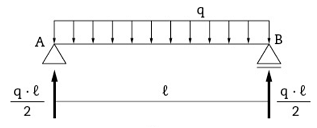

<span style="font-family: Arial;font-weight: bold; font-size:1.3em;color:Green;"> RESOLUÇÃO VIA PYTHON </span>

<span style="font-family: Arial;font-weight: bold; font-size:1em;color:blue;"> 1 - DADOS DO EXERCÍCIO </span>

In [1]:
q = 10 # em kN/m       
L = 5  # em m
print('1.1 Carga q =',q,'kN/m')
print('1.2 Vão L =',L,'m')

1.1 Carga q = 10 kN/m
1.2 Vão L = 5 m


<span style="font-family: Arial;font-weight: bold; font-size:1em;color:blue;"> 2 - CÁLCULO DAS REAÇÕES NOS APOIOS </span>

<span style="font-family: Arial; font-size:1EM;color:red;"> 2.1 - Equilíbrio Forças Verticais</span>

In [2]:
VA = (q * L)/2
VB = q * L - VA    
print('2.1.1 Reação VA =',VA,'kN')
print('2.1.2 Reação VB =',VB,'kN')

2.1.1 Reação VA = 25.0 kN
2.1.2 Reação VB = 25.0 kN


<span style="font-family: Arial;font-weight: bold; font-size:1em;color:blue;"> 3 - FUNÇÕES CORTANTE E MOMENTO </span>

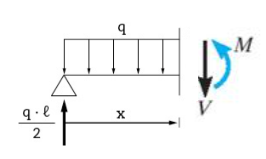

<span style="font-family: Arial; font-size:1EM;color:red;"> 3.1 - Seção x</span>

In [3]:
import sympy as sp

def seçãox():
    global V, M, x    
    x, V, M = sp.symbols("x V M")

    # ESFORÇO CORTANTE (Seção x) 
    VA - q*x - V == 0
    V = VA - q*x 
    print('Função Cortante V =',V)

    # MOMENTO FLETOR (Seção x) 
    - (VA*x) + ((q*x)*(x/2)) + M == 0
    M = (VA*x) - ((q * x**2)/2)
    M1 = sp.integrate(V,x) # Alternativa via Integração  
    V1 = sp.diff(M,x) # Alternativa da Função Cortante via Derivação
    print('Função Momento M =',M,'ou M1=',M1)
    print('Função Cortante V1 =',V1)

seçãox()

Função Cortante V = 25.0 - 10*x
Função Momento M = -5*x**2 + 25.0*x ou M1= -5.0*x**2 + 25.0*x
Função Cortante V1 = 25.0 - 10*x


<span style="font-family: Arial;font-weight: bold; font-size:1em;color:blue;"> 4 - ESFORÇOS SOLICITANTES </span>

In [4]:
import numpy as np
import pandas as pd

def esforços():
    
    global x, V, M, viga, x1    
    
    x1 = np.arange(0,L+0.1,0.25)
 
    viga=pd.DataFrame({"x":x1})   
    
    viga["M"]=VA*viga.x - (q*viga.x**2/2)
    viga["V"]=VA-q*viga.x  
    
    x=np.array(viga.x)
    M=np.array(viga.M)    
    V=np.array(viga.V)    
  
    display(viga)
      
esforços()  

,x,M,V
0,0.00,0.0000,25.0
1,0.25,5.9375,22.5
2,0.50,11.2500,20.0
3,0.75,15.9375,17.5
4,1.00,20.0000,15.0
5,1.25,23.4375,12.5
6,1.50,26.2500,10.0
7,1.75,28.4375,7.5
8,2.00,30.0000,5.0
9,2.25,30.9375,2.5


<span style="font-family: Arial;font-weight: bold; font-size:1em;color:blue;"> 5 - DIAGRAMAS </span>

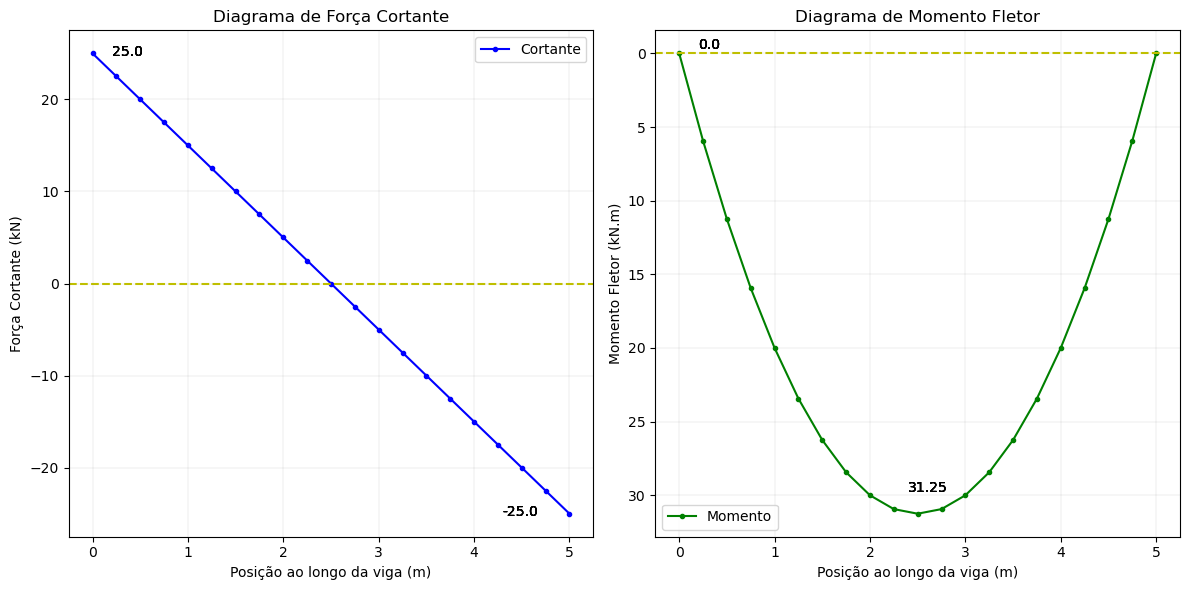

In [5]:
import matplotlib.pyplot as plt

def diagramas():
    
    # Criando uma figura com dois subplots lado a lado
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plotando o primeiro gráfico Força Cortante (ax1)
    ax1.plot(x,V, label='Cortante', color='blue',marker='.')
    ax1.set_title('Diagrama de Força Cortante')
    ax1.set_xlabel('Posição ao longo da viga (m)')
    ax1.set_ylabel('Força Cortante (kN)')
    ax1.grid(color='grey', linestyle='-', linewidth=0.1)
    ax1.legend(loc="best") 
    ax1.axhline(y = 0, color = 'y', linestyle = '--')  
    for i in range(0,L):
        ax1.annotate(viga.V[0],(viga.x[0]+0.2, viga.V[0]-0.3))
        ax1.annotate(viga.V[20],(viga.x[20]-0.7, viga.V[20]-0.3))
       
    # Plotando o segundo gráfico Momento Fletor (ax2)
    ax2.plot(x,M, label='Momento', color='green',marker='.')
    ax2.invert_yaxis()
    ax2.set_title('Diagrama de Momento Fletor')
    ax2.set_xlabel('Posição ao longo da viga (m)')
    ax2.set_ylabel('Momento Fletor (kN.m)')
    ax2.grid(color='grey', linestyle='-', linewidth=0.1)
    ax2.legend(loc="best")
    ax2.axhline(y = 0, color = 'y', linestyle = '--')
    for i in range(0,L):
        ax2.annotate(viga.M[0],(viga.x[0]+0.2, viga.M[0]-0.3))
        ax2.annotate(viga.M[10],(viga.x[10]-0.1, viga.M[10]-1.5))
  
    
    # Ajustando o layout para evitar sobreposição
    plt.tight_layout()

    # Mostrando os gráficos
    plt.show()

diagramas()

<span style="font-family: Arial;font-weight: bold; font-size:1em;color:blue;"> 6 - EXPORTAR RESULTADOS </span>

In [6]:
viga=pd.DataFrame({"x":x1})   
    
viga["M (kN.m)"]=VA*viga.x - (q*viga.x**2/2)
viga["V (kN)"]=VA-q*viga.x 

with pd.ExcelWriter("esforçosEX1.xlsx") as writer:
        
                
        viga.to_excel(writer, sheet_name='Esforços EX1', index=False)
    